# POPENE advanced usage example

POPANE dataset usage in Python with pandas module. This is a more advanced example, with improved visualization.

### Imports

In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Reading the content of the datafiles

List available files

In [2]:
paths = glob.glob('study1_sample/*.csv', recursive=True)
paths

['study1_sample/S1_P1_Threat.csv',
 'study1_sample/S1_P3_Threat.csv',
 'study1_sample/S1_P3_Positive_Emotion_High_Approach.csv',
 'study1_sample/S1_P2_All.csv',
 'study1_sample/S1_P2_Neutral8.csv',
 'study1_sample/S1_P2_Baseline.csv',
 'study1_sample/S1_P1_Positive_Emotion_High_Approach.csv',
 'study1_sample/S1_P3_All.csv',
 'study1_sample/S1_P3_Baseline.csv',
 'study1_sample/S1_P1_Baseline.csv',
 'study1_sample/S1_P1_All.csv',
 'study1_sample/S1_P2_Threat.csv']

Restric to files containing all conditions for participants no. 1, 2 & 3.

In [3]:
paths = [i for i in paths if 'All' in i]
paths

['study1_sample/S1_P2_All.csv',
 'study1_sample/S1_P3_All.csv',
 'study1_sample/S1_P1_All.csv']

Get one of the files.

In [4]:
example_file = paths[0]

Preview the data with bash command.

In [5]:
!head -n 15 $example_file

In [6]:
print(example_file)

study1_sample/S1_P2_All.csv


Read file contents into pandas' DataFrame. Skip 9 first rows, these are the header.

In [7]:
df = pd.read_csv(example_file, skiprows=11)
df

,timestamp,affect,ECG,EDA,temp,respiration,SBP,DBP,marker
0,0.000,5.0,3.012,0.00,33.38,0.68,121.97,108.03,NaN
1,0.001,5.0,2.576,0.03,33.38,0.69,122.16,108.31,NaN
2,0.002,5.0,1.762,0.17,33.38,0.70,121.00,107.84,NaN
3,0.003,5.0,0.894,0.55,33.38,0.71,120.72,107.28,NaN
4,0.004,5.0,-0.049,1.26,33.38,0.73,121.53,107.69,NaN
...,...,...,...,...,...,...,...,...,...
941745,941.745,1.3,0.000,NaN,33.68,0.50,99.72,99.97,NaN
941746,941.746,1.3,0.021,NaN,33.68,0.50,100.19,100.31,NaN
941747,941.747,1.3,-0.008,NaN,33.68,0.50,99.09,99.72,NaN
941748,941.748,1.3,-0.032,NaN,33.68,0.50,99.22,100.06,NaN


## Descriptive statistics

Example descriptive statistics of the data frame.

In [8]:
df.describe()

,timestamp,affect,ECG,EDA,temp,respiration,SBP,DBP,marker
count,941750.000000,941750.000000,941750.000000,912754.000000,941750.000000,941750.000000,941750.000000,941750.000000,510003.000000
mean,470.874500,4.939183,0.049516,16.294775,33.948250,0.961860,103.702046,109.067772,49.823856
std,271.859952,2.691836,0.291976,1.476093,0.472775,1.380919,18.680043,18.788685,64.841542
min,0.000000,0.000000,-3.084000,0.000000,33.190000,-5.870000,-12.280000,-1.630000,-1.000000
25%,235.437250,1.300000,-0.051000,15.360000,33.550000,-0.010000,90.190000,94.880000,-1.000000
50%,470.874500,5.000000,0.010000,16.040000,33.890000,1.150000,102.030000,108.970000,-1.000000
75%,706.311750,7.500000,0.078000,17.270000,34.410000,1.880000,115.130000,122.000000,108.000000
max,941.749000,9.900000,4.044000,20.480000,34.770000,7.310000,201.030000,201.130000,209.000000


In [9]:
print('Data were acquired for %.2f minutes' % (df['timestamp'].iloc[-1]/60))

Data were acquired for 15.70 minutes


## Plotting the dataframe

In [10]:
(df.timestamp/1000)

0         0.000000
1         0.000001
2         0.000002
3         0.000003
4         0.000004
            ...   
941745    0.941745
941746    0.941746
941747    0.941747
941748    0.941748
941749    0.941749
Name: timestamp, Length: 941750, dtype: float64

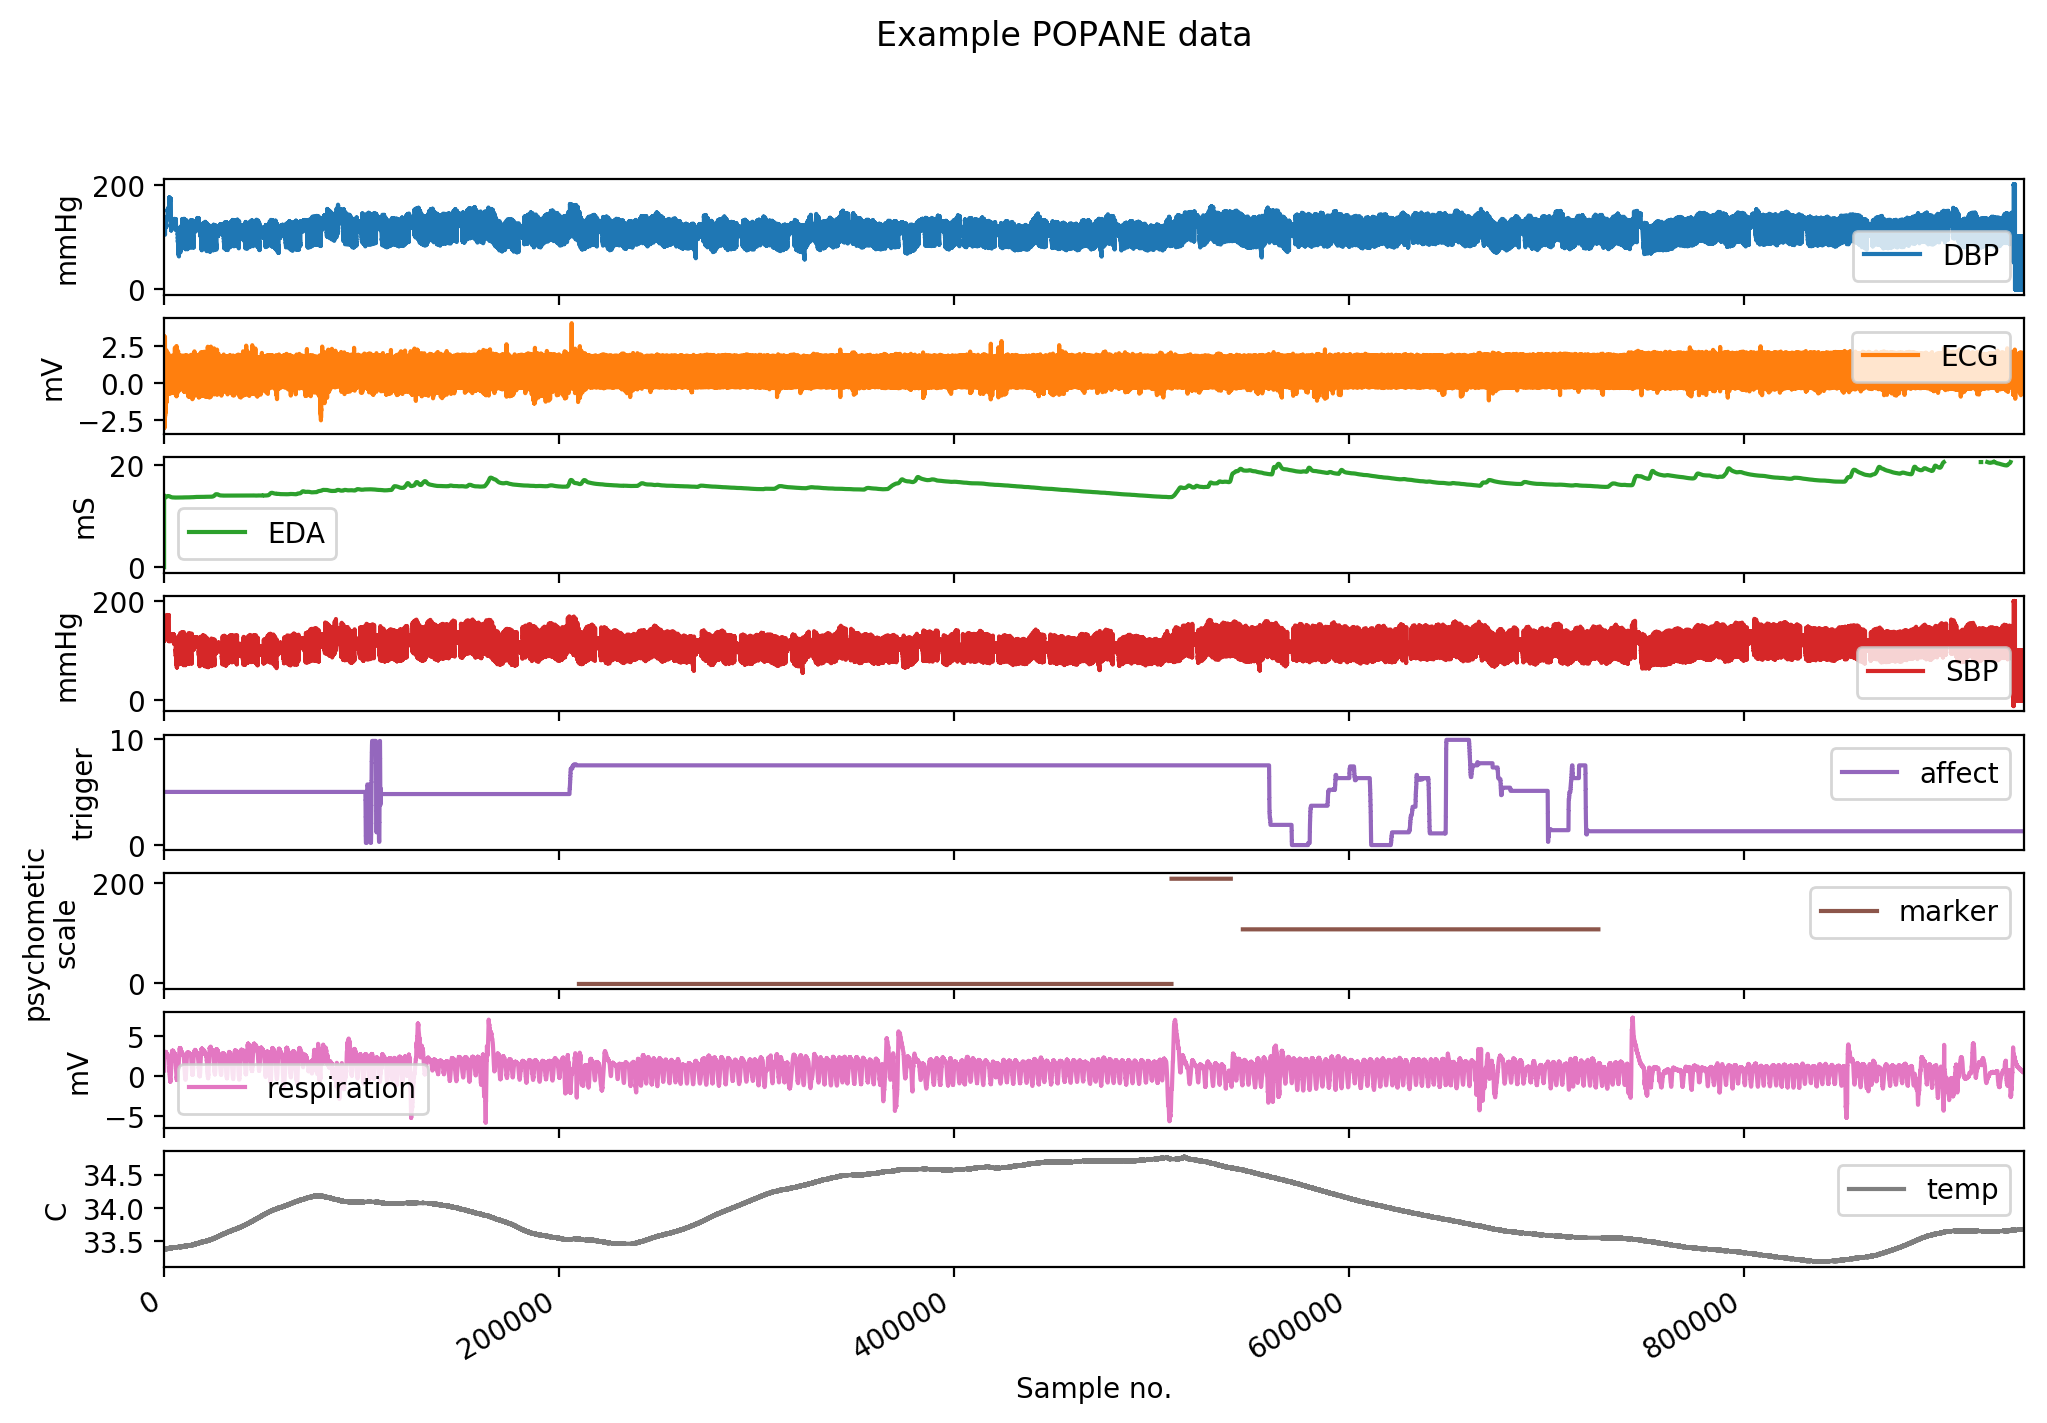

In [11]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

axes = df[df.columns.difference(['timestamp'])].plot(subplots=True,
                                                     title="Example POPANE data")
axes[0].set_ylabel('mmHg')
axes[1].set_ylabel('mV')
axes[2].set_ylabel('mS')
axes[3].set_ylabel('mmHg')
axes[4].set_ylabel('trigger')
axes[5].set_ylabel('psychometic\nscale')
axes[6].set_ylabel('mV')
axes[7].set_ylabel('C')
plt.xlabel('Sample no.')
plt.show()